In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from getdata import DataSlicer
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
from statistics  import StatisticalTests
import seaborn as sns

### Read dataset

In [4]:
# Create an instance of the DataSlicer class
data_path = r"C:\phaseII\static\dataset-individual-Items.csv"
data_slicer = DataSlicer(data_path)
# # Call the functions on the data_slicer instance
df = data_slicer.read_data()
df_avg = data_slicer.average_scores()
techniques = df_avg.iloc[:, -10:]

### Calls statistical funtions

In [5]:
# Create an instance of the StatisticalTests class
tests = StatisticalTests()
# # Call the methods
# shapiro_results = tests.shapiro_test(data)
# tests.run_friedman_test(data)
# tests.perform_wilcoxon_test(data)
# tests.perform_Kruskal_Wallis(groups, group_names)


### Assess the assumption of normality using the Shapiro-Wilk test

In [13]:

shapiro_results = tests.shapiro_test(techniques)
shapiro_results

,Variable,W-Value,P-Value,Normality
0,Social proof,0.990488,3.693605e-10,Fail
1,Flattery,0.966031,2.855571e-21,Fail
2,Rht_Question,0.984696,8.717503e-14,Fail
3,Antanagoge,0.990775,6.022404e-10,Fail
4,Logic,0.982237,4.734199e-15,Fail
5,Authority,0.984377,5.872819e-14,Fail
6,Pathos,0.986548,9.675586e-13,Fail
7,Repetition,0.983267,1.549267e-14,Fail
8,Framing,0.972903,5.708106e-19,Fail
9,Anaphora,0.985276,1.813606e-13,Fail


In [14]:
tests.run_friedman_test(techniques)

Friedman Test: Test Statistic = 1822.439, p-value = 0.000
The difference is statistically significant.
╒══════════════════════════════════════════╤═══════════╕
│ Test                                     │ Value     │
╞══════════════════════════════════════════╪═══════════╡
│ Friedman test (Chi-squared)              │ 1822.4390 │
├──────────────────────────────────────────┼───────────┤
│ Friedman test (Degrees of freedom)       │ 9         │
├──────────────────────────────────────────┼───────────┤
│ Friedman test (P value)                  │ 0.0000    │
├──────────────────────────────────────────┼───────────┤
│ Bonferroni-adjusted significance level   │ 0.0050    │
├──────────────────────────────────────────┼───────────┤
│ Significance after Bonferroni correction │ Yes       │
╘══════════════════════════════════════════╧═══════════╛


In [15]:
tests.perform_wilcoxon_test(techniques)


Bonferroni-adjusted Significance Level: 0.0011111111111111111

╒══════════════════════════════╤════════╤═══════════╤════════════════╤════════════════╤═════════════════════════════╕
│ Test                         │     TS │   P-value │   Adj. P-value │ Significance   │ Direction                   │
╞══════════════════════════════╪════════╪═══════════╪════════════════╪════════════════╪═════════════════════════════╡
│ Social proof vs Flattery     │ 527893 │   0       │        0       │ Yes            │ Flattery > Social proof     │
├──────────────────────────────┼────────┼───────────┼────────────────┼────────────────┼─────────────────────────────┤
│ Social proof vs Rht_Question │ 721488 │   5e-05   │        0.00209 │ Yes            │ Rht_Question > Social proof │
├──────────────────────────────┼────────┼───────────┼────────────────┼────────────────┼─────────────────────────────┤
│ Social proof vs Antanagoge   │ 721420 │   0       │        3e-05   │ Yes            │ Antanagoge > Social pr

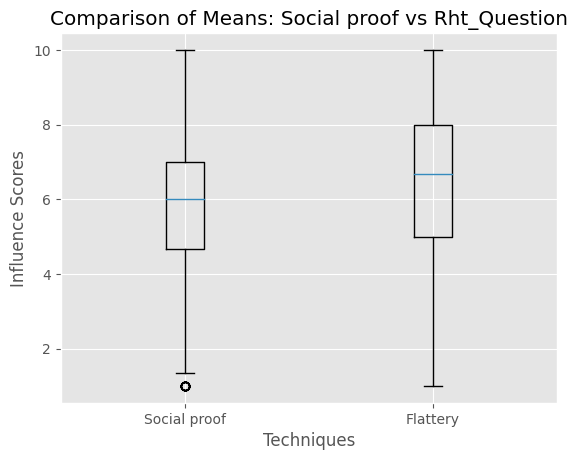

In [72]:


def plot_boxplot(data, columns, title):
    plt.style.use('ggplot')
    plt.boxplot(data, labels=columns)
    plt.xlabel('Techniques')
    plt.ylabel('Influence Scores')
    plt.title(title)
    plt.show()



# Create a list of column data
data = [df_avg[column] for column in columns]

# Call the function to plot the boxplot
plot_boxplot(data, columns, 'Comparison of Means: Social proof vs Rht_Question: ')


"The Wilcoxon test was performed to compare the effectiveness of social proof and flattery in influencing behavior. The test revealed a significant difference between the two conditions (TS = 527,893, p < .001, adjusted p < .00111). The effect was found to be in the direction where flattery was more effective than social proof."

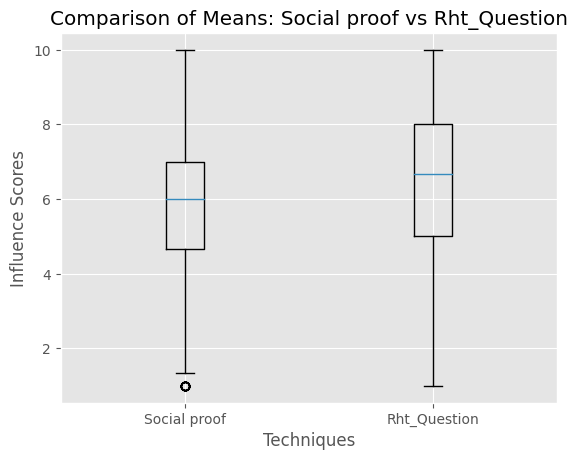

In [73]:
columns = ['Social proof', 'Rht_Question']
plot_boxplot(data, columns, 'Comparison of Means: Social proof vs Rht_Question')


"The test was performed to compare the effectiveness of social proof and the right question in influencing behavior. The test revealed a significant difference between the two conditions (TS = 721,488, p < .001, adjusted p = 0.00209). The effect was found to be in the direction where the rethorical question was more effective than social proof."

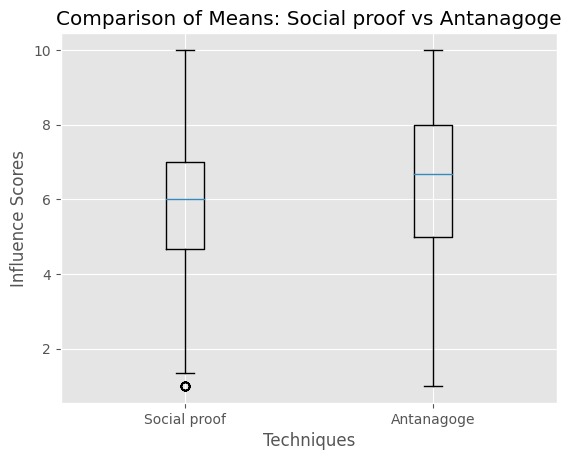

In [78]:
columns = ['Social proof' , 'Antanagoge' ]
plot_boxplot(data, columns, 'Comparison of Means: Social proof vs Antanagoge')

"The test was performed to compare the effectiveness of social proof and antanagoge in influencing behavior. The test revealed a significant difference between the two conditions (TS = 721,420, p < .001, adjusted p = 0.00003). The effect was found to be in the direction where antanagoge was more effective than social proof."

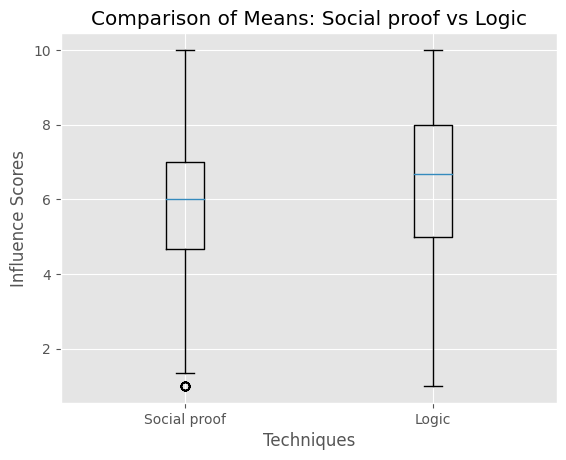

In [77]:
columns = ['Social proof' , 'Logic' ]
plot_boxplot(data, columns, 'Comparison of Means: Social proof vs Logic')

"The test was performed to compare the effectiveness of social proof and logic in influencing behavior. The test revealed a significant difference between the two conditions (TS = 526,180.0, p < .001, adjusted p < .001). The effect was found to be in the direction where logic was more effective than social proof."

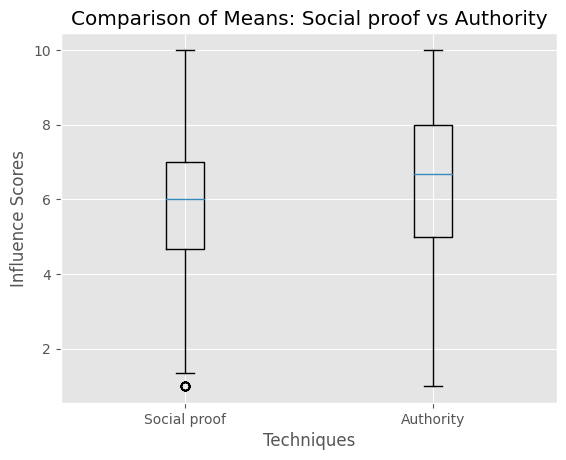

In [79]:
columns = ['Social proof' , 'Authority' ]
plot_boxplot(data, columns, 'Comparison of Means: Social proof vs Authority')

The test was performed to compare the effectiveness of social proof and authority in influencing behavior. The test revealed a significant difference between the two conditions (TS = 395,295.0, p < .001, adjusted p < .001). The effect was found to be in the direction where authority was more effective than social proof."

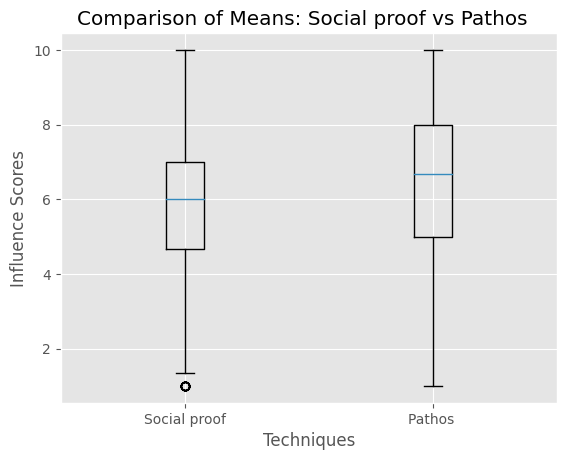

In [86]:
columns = ['Social proof' , 'Pathos ' ]
plot_boxplot(data, columns, 'Comparison of Means: Social proof vs Pathos  ')